In [1]:
import numpy as np
from numpy import ndarray

from typing import Callable, Dict, Tuple, List

np.set_printoptions(precision=4)

**Callable** : Used to specify that a parameter or a return type is a function

**np.set_printoptions(precision=4)**: This line sets the printing options for NumPy arrays to display floating-point numbers with 4 decimal places.

**California_Housing**

In [2]:
from sklearn.datasets import fetch_california_housing


In [3]:
california = fetch_california_housing()

In [4]:
data = california.data
target = california.target
features = california.feature_names

In [10]:
features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

**SciKit Learn Linear Regression**

**Data Preparation**

In [5]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(data)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80718)

y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

The code y_train.reshape(-1, 1) and y_test.reshape(-1, 1) is reshaping the arrays y_train and y_test to have a shape of (n, 1), where n is the number of elements in y_train and y_test, respectively.

**Regression**

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [8]:
import matplotlib.pyplot as plt

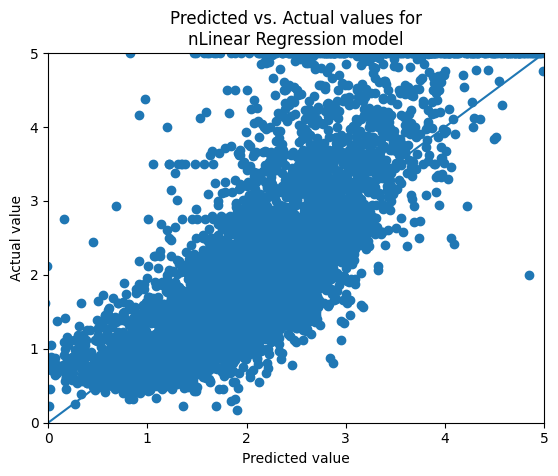

In [9]:

plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\nnLinear Regression model")
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.scatter(preds, y_test)
plt.plot([0, 5], [0, 5]);

**Testing changing feature**

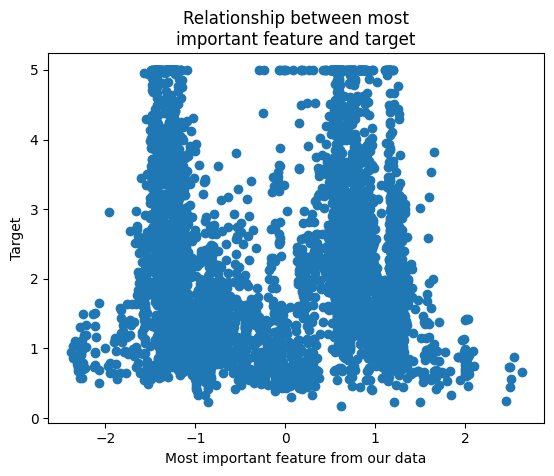

In [12]:

plt.scatter(X_test[:, 7], y_test)
plt.xlabel("Most important feature from our data")
plt.ylabel("Target")
plt.title("Relationship between most\nimportant feature and target");

**Model Error**

In [13]:
def mae(preds: ndarray, actuals: ndarray):
    '''
    Compute mean absolute error.
    '''
    return np.mean(np.abs(preds - actuals))

def rmse(preds: ndarray, actuals: ndarray):
    '''
    Compute root mean squared error.
    '''
    return np.sqrt(np.mean(np.power(preds - actuals, 2)))

In [14]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 0.5312 
Root mean squared error: 0.7154


In [15]:
import numpy as np
np.round(lr.coef_, 2)

array([[ 0.83,  0.12, -0.27,  0.3 , -0.01, -0.03, -0.9 , -0.86]])

**Manual linear regression***

In [16]:
def forward_linear_regression(X_batch: ndarray,
                              y_batch: ndarray,
                              weights: Dict[str, ndarray]
                              )-> Tuple[float, Dict[str, ndarray]]:
    '''
    Forward pass for the step-by-step linear regression.
    '''
    # assert batch sizes of X and y are equal
    assert X_batch.shape[0] == y_batch.shape[0]

    # assert that matrix multiplication can work
    assert X_batch.shape[1] == weights['W'].shape[0]

    # assert that B is simply a 1x1 ndarray
    assert weights['B'].shape[0] == weights['B'].shape[1] == 1

    # compute the operations on the forward pass
    N = np.dot(X_batch, weights['W'])

    P = N + weights['B']

    loss = np.mean(np.power(y_batch - P, 2))

    # save the information computed on the forward pass
    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X_batch         # input
    forward_info['N'] = N               # weighted sum
    forward_info['P'] = P               # bias added
    forward_info['y'] = y_batch         # output

    return loss, forward_info

In [17]:
def to_2d_np(a: ndarray,
             type: str = "col") -> ndarray:
    '''
    Turns a 1D Tensor into 2D
    '''

    assert a.ndim == 1, \
    "Input tensors must be 1 dimensional"

    if type == "col":
        return a.reshape(-1, 1)
    elif type == "row":
        return a.reshape(1, -1)

**a.reshape(-1, 1)**  The argument -1 in reshape is a special value that tells NumPy to automatically determine the size of that dimension based on the size of the other dimensions.
And 1 specifies that the resulting array should have 1 column.

In [20]:
import numpy as np

a = np.array([1, 2, 3, 4, 5])
col_vector = a.reshape(-1, 1)
print(col_vector)


[[1]
 [2]
 [3]
 [4]
 [5]]


In [21]:
# Example :
x = np.array([1,2,3,4,5])
to_2d_np(x,type='row')

array([[1, 2, 3, 4, 5]])

**to_2d_np**: function to convert 1D array inot 2D array

In [22]:
def permute_data(X: ndarray, y: ndarray):
    '''
    Permute X and y, using the same permutation, along axis=0
    '''
    perm = np.random.permutation(X.shape[0])
    return X[perm], y[perm]

**np.random.permutation(X.shape[0])** : This line generates a random permutation of integers from 0 to the length of the first axis of array X. This permutation will be used to shuffle both X and y in the same way.

In [ ]:
def loss_gradients(forward_info: Dict[str, ndarray],
                   weights: Dict[str, ndarray]) -> Dict[str, ndarray]:
    '''
    Compute dLdW and dLdB for the step-by-step linear regression model.
    '''
    batch_size = forward_info['X'].shape[0]

    dLdP = -2 * (forward_info['y'] - forward_info['P'])

    dPdN = np.ones_like(forward_info['N'])    # Gradient of Predictions w.r.t. N, which is 1 since P = N

    dPdB = np.ones_like(weights['B'])         # Gradient of Predictions w.r.t. Biases, also 1 since B is added directly

    dLdN = dLdP * dPdN

    dNdW = np.transpose(forward_info['X'], (1, 0))

    # need to use matrix multiplication here,
    # with dNdW on the left (see note at the end of last chapter)
    dLdW = np.dot(dNdW, dLdN)

    # need to sum along dimension representing the batch size:
    # see note near the end of the chapter
    dLdB = (dLdP * dPdB).sum(axis=0)

    loss_gradients: Dict[str, ndarray] = {}
    loss_gradients['W'] = dLdW
    loss_gradients['B'] = dLdB

    return loss_gradients

In [ ]:
Batch = Tuple[ndarray, ndarray]

def generate_batch(X: ndarray,
                   y: ndarray,
                   start: int = 0,
                   batch_size: int = 10) -> Batch:
    '''
    Generate batch from X and y, given a start position
    '''
    assert X.ndim == y.ndim == 2, \
    "X and Y must be 2 dimensional"

    if start+batch_size > X.shape[0]:
        batch_size = X.shape[0] - start

    X_batch, y_batch = X[start:start+batch_size], y[start:start+batch_size]

    return X_batch, y_batch

In [ ]:
def forward_loss(X: ndarray,
                 y: ndarray,
                 weights: Dict[str, ndarray]) -> Tuple[Dict[str, ndarray], float]:
    '''
    Generate predictions and calculate loss for a step-by-step linear regression
    (used mostly during inference).
    '''
    N = np.dot(X, weights['W'])

    P = N + weights['B']

    loss = np.mean(np.power(y - P, 2))

    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X
    forward_info['N'] = N
    forward_info['P'] = P
    forward_info['y'] = y

    return forward_info, loss

In [ ]:
def init_weights(n_in: int) -> Dict[str, ndarray]:
    '''
    Initialize weights on first forward pass of model.
    '''

    weights: Dict[str, ndarray] = {}
    W = np.random.randn(n_in, 1)
    B = np.random.randn(1, 1)

    weights['W'] = W
    weights['B'] = B

    return weights

In [ ]:
def train(X: ndarray,
          y: ndarray,
          n_iter: int = 1000,
          learning_rate: float = 0.01,
          batch_size: int = 100,
          return_losses: bool = False,
          return_weights: bool = False,
          seed: int = 1) -> None:
    '''
    Train model for a certain number of epochs.
    '''
    if seed:
        np.random.seed(seed)
    start = 0

    # Initialize weights
    weights = init_weights(X.shape[1])

    # Permute data
    X, y = permute_data(X, y)

    if return_losses:
        losses = []
    for i in range(n_iter):

        # Generate batch
        if start >= X.shape[0]:
            X, y = permute_data(X, y)
            start = 0

        X_batch, y_batch = generate_batch(X, y, start, batch_size)
        start += batch_size

        # Train net using generated batch
        forward_info, loss = forward_loss(X_batch, y_batch, weights)

        if return_losses:
            losses.append(loss)

        loss_grads = loss_gradients(forward_info, weights)
        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]

    if return_weights:
        return losses, weights

    return None

In [ ]:
train_info = train(X_train, y_train,
                   n_iter = 1000,
                   learning_rate = 0.001,
                   batch_size=23,
                   return_losses=True,
                   return_weights=True,
                   seed=180708)
losses = train_info[0]
weights = train_info[1]

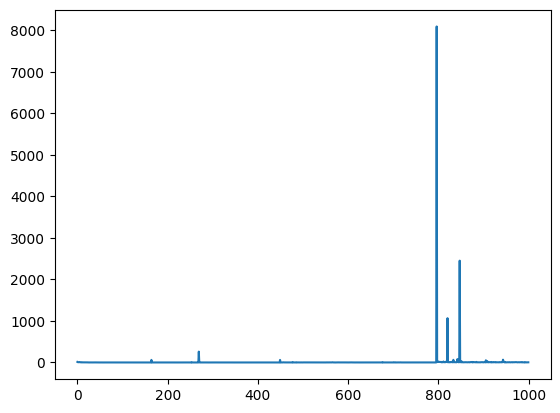

In [ ]:
plt.plot(list(range(1000)), losses);

In [ ]:
def predict(X: ndarray,
            weights: Dict[str, ndarray]):
    '''
    Generate predictions from the step-by-step linear regression model.
    '''

    N = np.dot(X, weights['W'])

    return N + weights['B']

In [ ]:
preds = predict(X_test, weights)

In [ ]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 1.8794 
Root mean squared error: 4.7979


In [ ]:
np.round(y_test.mean(), 4)

2.0715

In [ ]:
np.round(rmse(preds, y_test) / y_test.mean(), 4)

2.3162

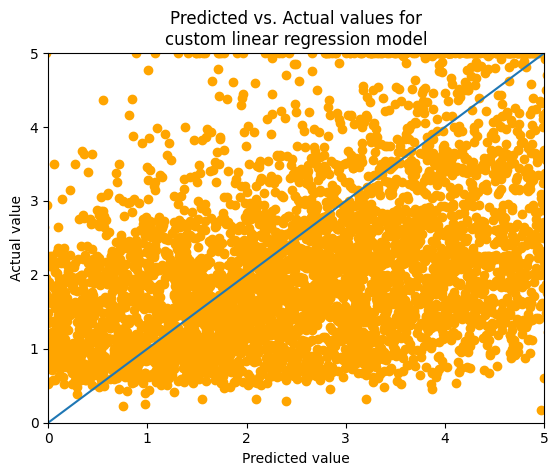

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\ncustom linear regression model")
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.scatter(preds, y_test, color='orange')  # Adding color='red' to specify the color of the points
plt.plot([0, 5], [0, 5])
plt.show()


In [ ]:
NUM = 40
a = np.repeat(X_test[:,:-1].mean(axis=0, keepdims=True), NUM, axis=0)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)

test_feature = np.concatenate([a, b], axis=1)
test_preds = predict(test_feature, weights)[:, 0]

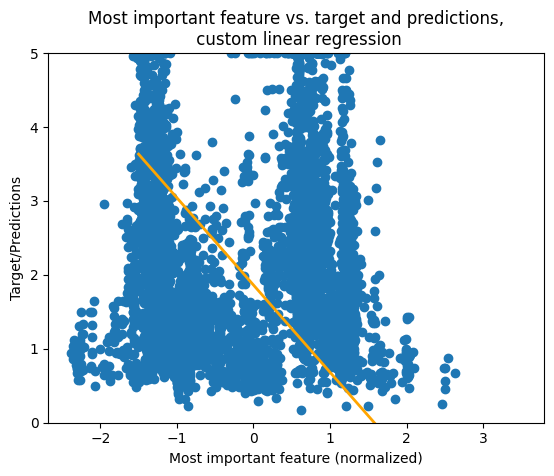

In [ ]:
plt.scatter(X_test[:, 7], y_test)
plt.plot(np.array(test_feature[:, -1]), test_preds, linewidth=2, c='orange')
plt.ylim([0, 5])
plt.xlabel("Most important feature (normalized)")
plt.ylabel("Target/Predictions")
plt.title("Most important feature vs. target and predictions,\n custom linear regression");

**Coefficients**

In [ ]:
np.round(weights['W'].reshape(-1), 4)

array([  0.3285,   0.2875,   0.3094,  -0.3566,   0.5549, -36.1387,
        -1.4235,  -1.1807])

In [ ]:
np.round(lr.coef_, 4)

array([[ 0.8287,  0.1206, -0.2698,  0.2986, -0.0127, -0.0337, -0.8962,
        -0.863 ]])

In [ ]:
np.round(weights['B'], 4)

array([[1.4731]])

In [ ]:

np.round(lr.intercept_, 4)

array([2.0743])

Coefficients are the almost same in the SciKit Learn linear regression as in the "custom" linear regression.

**Neural Network Regression**

In [ ]:
def sigmoid(x: ndarray) -> ndarray:
    return 1 / (1 + np.exp(-1.0 * x))

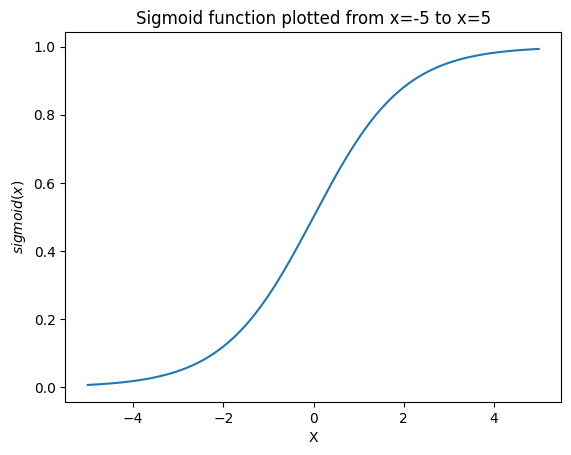

In [ ]:

plt.plot(np.arange(-5, 5, 0.01),
         sigmoid(np.arange(-5, 5, 0.01)));
plt.title("Sigmoid function plotted from x=-5 to x=5")
plt.xlabel("X")
plt.ylabel("$sigmoid(x)$");

In [ ]:
def init_weights(input_size: int,
                 hidden_size: int) -> Dict[str, ndarray]:
    '''
    Initialize weights during the forward pass for step-by-step neural network model.
    '''
    weights: Dict[str, ndarray] = {}
    weights['W1'] = np.random.randn(input_size, hidden_size)
    weights['B1'] = np.random.randn(1, hidden_size)
    weights['W2'] = np.random.randn(hidden_size, 1)
    weights['B2'] = np.random.randn(1, 1)
    return weights

In [ ]:
def forward_loss(X: ndarray,
                 y: ndarray,
                 weights: Dict[str, ndarray]
                 ) -> Tuple[Dict[str, ndarray], float]:
    '''
    Compute the forward pass and the loss for the step-by-step
    neural network model.
    '''
    M1 = np.dot(X, weights['W1'])

    N1 = M1 + weights['B1']

    O1 = sigmoid(N1)

    M2 = np.dot(O1, weights['W2'])

    P = M2 + weights['B2']

    loss = np.mean(np.power(y - P, 2))

    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X
    forward_info['M1'] = M1
    forward_info['N1'] = N1
    forward_info['O1'] = O1
    forward_info['M2'] = M2
    forward_info['P'] = P
    forward_info['y'] = y

    return forward_info, loss

In [ ]:
def loss_gradients(forward_info: Dict[str, ndarray],
                   weights: Dict[str, ndarray]) -> Dict[str, ndarray]:
    '''
    Compute the partial derivatives of the loss with respect to each of the parameters in the neural network.
    '''
    dLdP = -(forward_info['y'] - forward_info['P'])

    dPdM2 = np.ones_like(forward_info['M2'])

    dLdM2 = dLdP * dPdM2

    dPdB2 = np.ones_like(weights['B2'])

    dLdB2 = (dLdP * dPdB2).sum(axis=0)

    dM2dW2 = np.transpose(forward_info['O1'], (1, 0))

    dLdW2 = np.dot(dM2dW2, dLdP)

    dM2dO1 = np.transpose(weights['W2'], (1, 0))

    dLdO1 = np.dot(dLdM2, dM2dO1)

    dO1dN1 = sigmoid(forward_info['N1']) * (1- sigmoid(forward_info['N1']))

    dLdN1 = dLdO1 * dO1dN1

    dN1dB1 = np.ones_like(weights['B1'])

    dN1dM1 = np.ones_like(forward_info['M1'])

    dLdB1 = (dLdN1 * dN1dB1).sum(axis=0)

    dLdM1 = dLdN1 * dN1dM1

    dM1dW1 = np.transpose(forward_info['X'], (1, 0))

    dLdW1 = np.dot(dM1dW1, dLdM1)

    loss_gradients: Dict[str, ndarray] = {}
    loss_gradients['W2'] = dLdW2
    loss_gradients['B2'] = dLdB2.sum(axis=0)
    loss_gradients['W1'] = dLdW1
    loss_gradients['B1'] = dLdB1.sum(axis=0)

    return loss_gradients


In [ ]:
def predict(X: ndarray,
            weights: Dict[str, ndarray]) -> ndarray:
    '''
    Generate predictions from the step-by-step neural network model.
    '''
    M1 = np.dot(X, weights['W1'])

    N1 = M1 + weights['B1']

    O1 = sigmoid(N1)

    M2 = np.dot(O1, weights['W2'])

    P = M2 + weights['B2']

    return P

In [ ]:
def train(X_train: ndarray, y_train: ndarray,
          X_test: ndarray, y_test: ndarray,
          n_iter: int = 1000,
          test_every: int = 1000,
          learning_rate: float = 0.01,
          hidden_size= 13,
          batch_size: int = 100,
          return_losses: bool = False,
          return_weights: bool = False,
          return_scores: bool = False,
          seed: int = 1) -> None:

    if seed:
        np.random.seed(seed)

    start = 0

    # Initialize weights
    weights = init_weights(X_train.shape[1],
                           hidden_size=hidden_size)

    # Permute data
    X_train, y_train = permute_data(X_train, y_train)


    losses = []

    val_scores = []

    for i in range(n_iter):

        # Generate batch
        if start >= X_train.shape[0]:
            X_train, y_train = permute_data(X_train, y_train)
            start = 0

        X_batch, y_batch = generate_batch(X_train, y_train, start, batch_size)
        start += batch_size

        # Train net using generated batch
        forward_info, loss = forward_loss(X_batch, y_batch, weights)

        if return_losses:
            losses.append(loss)

        loss_grads = loss_gradients(forward_info, weights)
        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]

        if return_scores:
            if i % test_every == 0 and i != 0:
                preds = predict(X_test, weights)
                val_scores.append(r2_score(preds, y_test))

    if return_weights:
        return losses, weights, val_scores

    return None

In [ ]:

TEST_ALL = False

In [ ]:
if TEST_ALL:
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.ylim([-1,1])
    plt.plot(list(range(int(num_iter / test_every - 1))), val_scores);
    plt.xlabel("Batches (000s)")
    plt.title("Validation Scores")

**Learning rate tuning**

In [ ]:
def r2_score_lr(learning_rate):
    train_info = train(X_train, y_train, X_test, y_test,
                   n_iter=100000,
                   test_every = 100000,
                   learning_rate = learning_rate,
                   batch_size=23,
                   return_losses=False,
                   return_weights=True,
                   return_scores=False,
                   seed=80718)
    weights = train_info[1]
    preds = predict(X_test, weights)
    return r2_score(y_test, preds)

In [ ]:
if TEST_ALL:
    lrs = np.geomspace(1e-2, 1e-6, num=20)

In [ ]:
if TEST_ALL:
    plt.semilogx(lrs, r2s)

**Evaluating best model**

In [ ]:
train_info = train(X_train, y_train, X_test, y_test,
                   n_iter=10000,
                   test_every = 1000,
                   learning_rate = 0.001,
                   batch_size=23,
                   return_losses=True,
                   return_weights=True,
                   return_scores=False,
                   seed=180807)
losses = train_info[0]
weights = train_info[1]

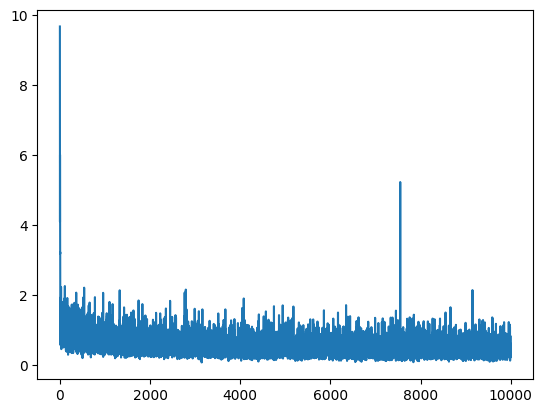

In [ ]:
plt.plot(list(range(10000)), losses);


In [ ]:
preds = predict(X_test, weights)


**Investigation of most important features**

In [ ]:
weights['W2']

array([[ 1.2289],
       [ 2.5357],
       [ 1.3861],
       [-0.7213],
       [ 1.054 ],
       [ 0.168 ],
       [ 0.0681],
       [-0.6203],
       [-0.3194],
       [ 0.2082],
       [ 0.5705],
       [ 0.1717],
       [ 0.519 ]])

In [ ]:

weights['W1'][7]

array([-0.1701, -1.4263, -0.276 , -0.7266, -0.2784, -3.487 , -0.7796,
        0.774 ,  2.0498, -0.344 ,  0.827 , -1.0513,  0.275 ])

In [ ]:

weights['W1'][5]

array([-1.5303, -1.1264,  0.3571,  1.6069, -1.9136,  0.8667,  0.5066,
        0.8712, -1.2085, -0.2495,  0.2211,  2.4134, -0.4853])

In [ ]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 0.4681 
Root mean squared error: 0.6495


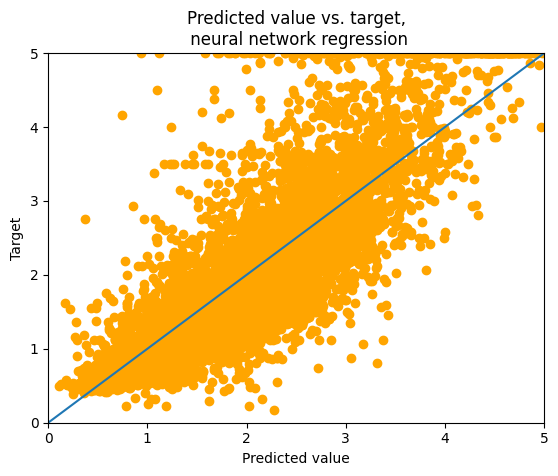

In [ ]:
plt.xlabel("Predicted value")
plt.ylabel("Target")
plt.title("Predicted value vs. target,\n neural network regression")
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.scatter(preds, y_test, color='orange')
plt.plot([0, 5], [0, 5]);

In [ ]:
np.round(np.mean(np.array(np.abs(preds - y_test))), 4)

0.4681

In [ ]:
np.round(np.mean(np.array(np.power(preds - y_test, 2))), 4)


0.4219

In [ ]:
NUM = 40
a = np.repeat(X_test[:,:-1].mean(axis=0, keepdims=True), NUM, axis=0)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)
test_feature = np.concatenate([a, b], axis=1)
preds_test = predict(test_feature, weights)[:, 0]

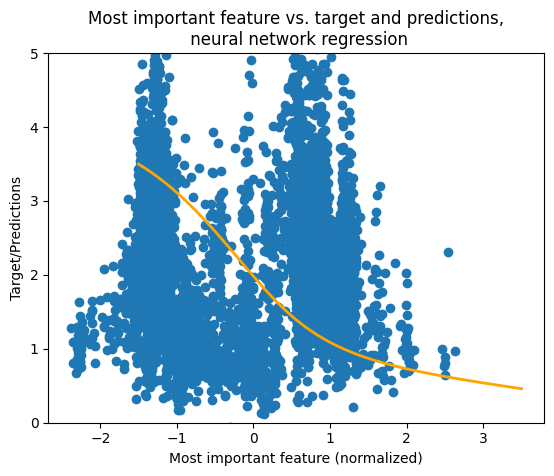

In [ ]:
plt.scatter(X_test[:,7 ], preds)
plt.plot(np.array(test_feature[:, -1]), preds_test, linewidth=2, c='orange')
plt.ylim([0, 5])
plt.xlabel("Most important feature (normalized)")
plt.ylabel("Target/Predictions")
plt.title("Most important feature vs. target and predictions,\n neural network regression");